> <b>Note</b>: We can use `Flight Price` and `Google Playstore` datasets as per the discussion in lecture.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                                    
warnings.filterwarnings("ignore")

In [3]:
flight = pd.read_excel('Assignment_25Mar_EDA2/flight_price.xlsx')
gplay = pd.read_csv('Assignment_25Mar_EDA2/googleplaystore.csv')

In [3]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have? 

In [5]:
flight.shape

(10683, 11)

Number of rows: 10683 & columns:11

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

<Axes: xlabel='Price', ylabel='Count'>

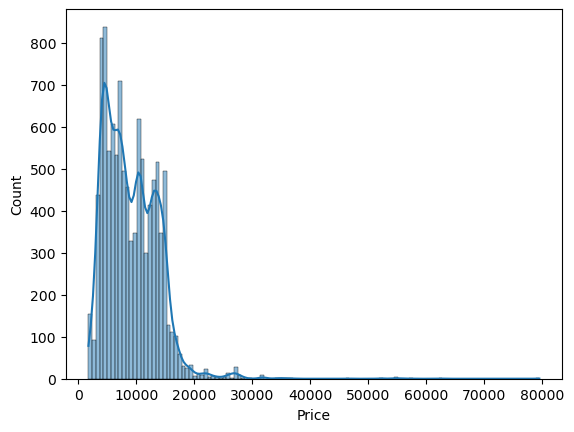

In [6]:
sns.histplot(x=flight.Price,kde=True)

Price column is right skewed or nearly log normal distribution.

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price? 

In [7]:
flight.Price.describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [8]:
"The minimum price is {} and maximum price is {}".format(flight.Price.describe()[3],flight.Price.describe()[7])

'The minimum price is 1759.0 and maximum price is 79512.0'

### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

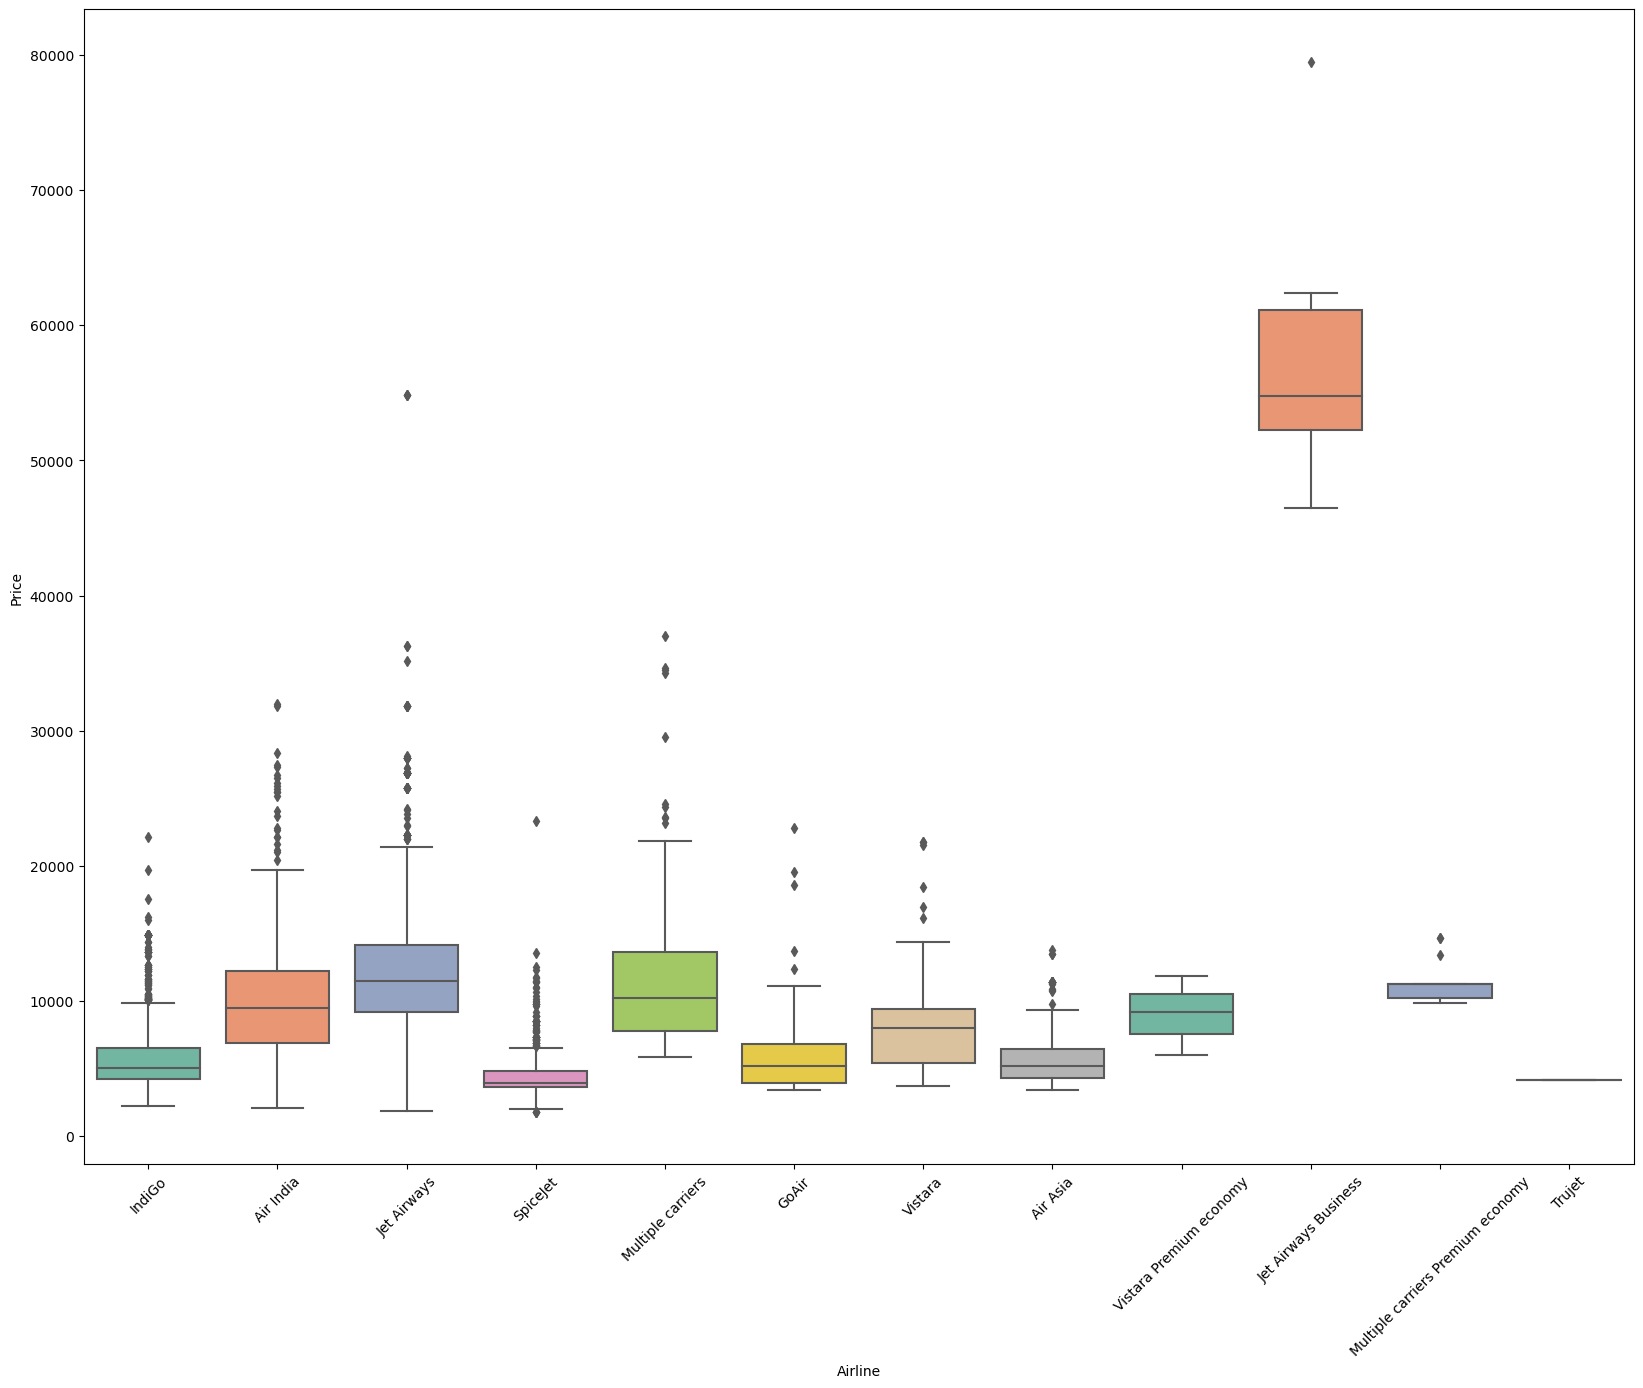

In [9]:
plt.figure(figsize=(20,15))
sns.boxplot(data=flight,x="Airline",y="Price", palette="Set2",color="r")
plt.xticks(rotation=45)
plt.show()

Above picture shows the price value distribution by Airlines.<br>
`Jet-Airways Business` have the maximum price values.

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

In [10]:
flight["Total_Stops"]=flight["Total_Stops"].map({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4, np.nan:1})

<Axes: >

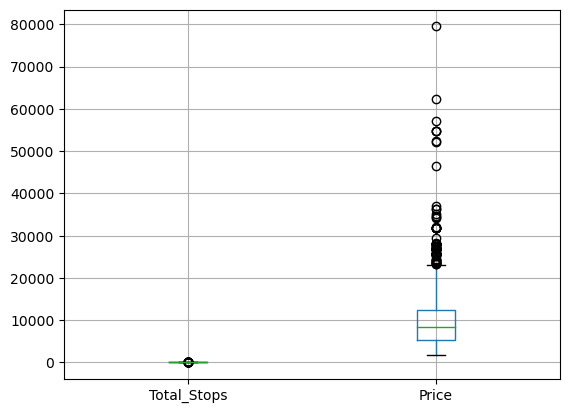

In [11]:
flight.boxplot()

In [12]:
flight[flight.Price>62000].count()

Airline            2
Date_of_Journey    2
Source             2
Destination        2
Route              2
Dep_Time           2
Arrival_Time       2
Duration           2
Total_Stops        2
Additional_Info    2
Price              2
dtype: int64

Since `Jet-Airways Business` have the highest number of prices. We can confirm that atleast 2 outliers present in data set.

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?


In [13]:
flight[["Day","Month","Year"]]=flight.Date_of_Journey.str.split("/",expand=True)
flight[["Day","Month","Year"]]=flight[["Day","Month","Year"]].astype(int)

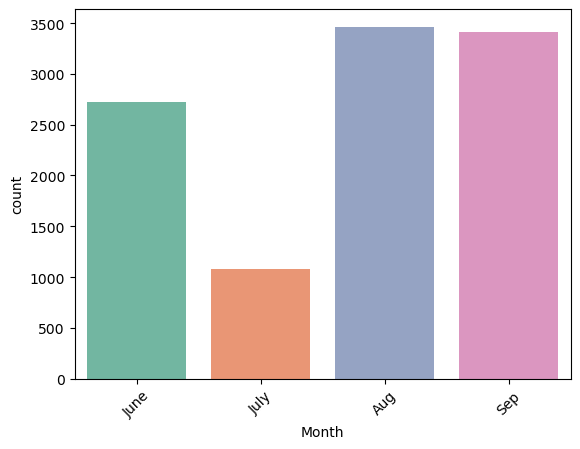

In [14]:
sns.countplot(data=flight,x="Month",palette="Set2",color="r")
plt.xticks(ticks=np.arange(4),labels=["June","July","Aug","Sep"],rotation=45)
plt.show()

The peak season months are June, Aug, Sep.

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


In [15]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


As a data analyst for the booking website i would look for following:
1. Peak seasons of travel - countplot with months
2. Ticket Price brackets for the Airlines to target the respective customer category - boxplot with price and airline
3. Busiest route with respect to time - scatter plot between Route & Dep_Time or Route & Arrival_Time
4. Ticket price relation with Total_Stops - boxplot
5. Duration of travel with respect to Arrival time - Scatter plot

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

The step by step procedure to follow will be:
1. **Data cleaning**<br>
Transform & Drop Date fo Journey into Y,M,D - already done in previous question<br>
Transform & Drop Date Arrival column into hours and minutes<br>
Transform & Drop Date Departure time<br>
Transform & Drop Date Total_Stops - already done in previous question<br>
Transform remaining Categorical features<br>

2. **Feature scaling, selection & EDA**<br>
Seperate the numeric and categorical columns<br>
Standardize the numeric columns for easy to compare<br>
Visaulization to get the insights/relationshsip between the variables<br>
Check the correlation matrix using heatmap<br>
Remove the features showing high corrleation with other independent features or seems logically non relevant<br>

3. **Encoding**<br>
Encode the categorical columns using OHE or SMOTE<br>

4. **Test train split**
5. **Model selection**
6. **Model fitting & prediction**
7. **Performance matrix**

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [5]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print("Number of rows: {} & coluns: {}".format(gplay.shape[0],gplay.shape[1]))

Number of rows: 10841 & coluns: 13


### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [22]:
gplay.drop(gplay.index[10472], inplace=True)
gplay.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


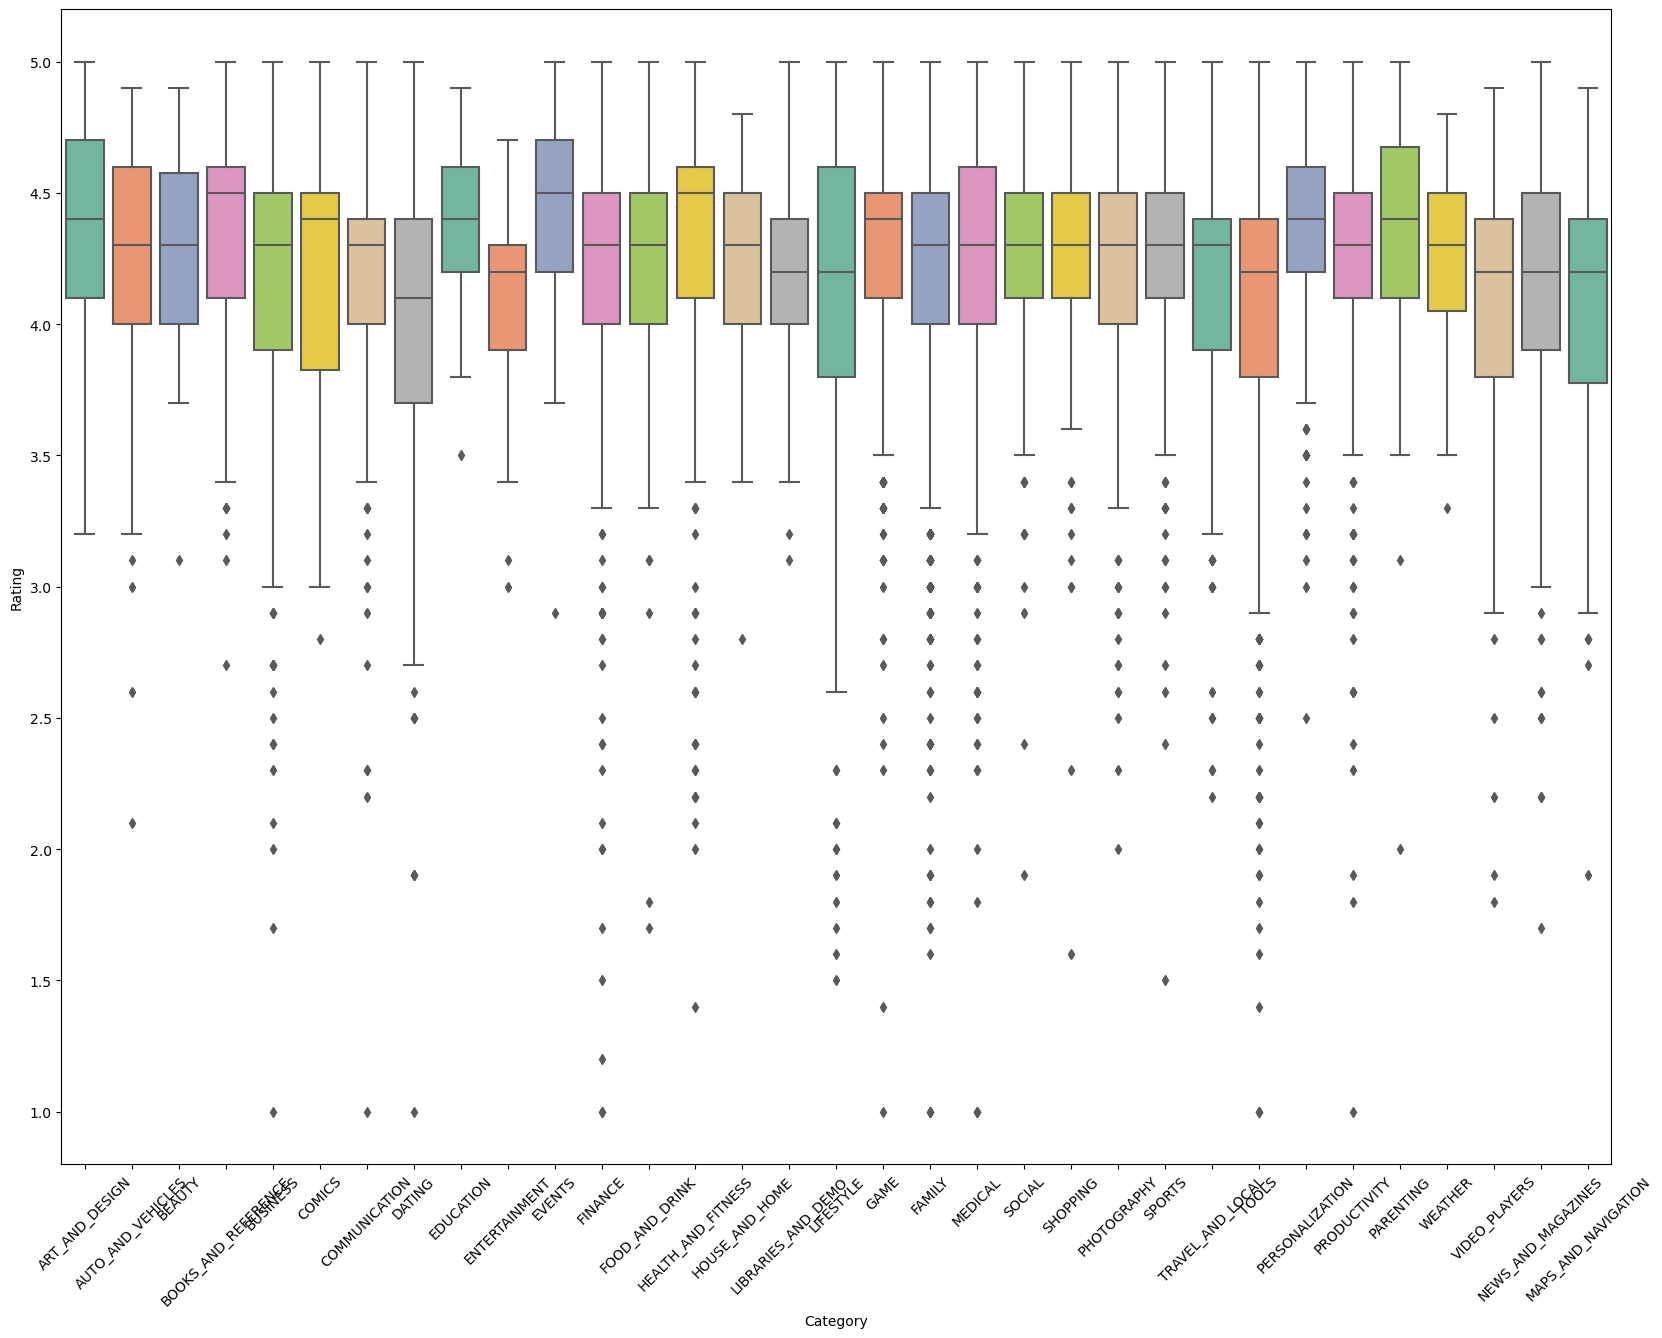

In [23]:
plt.figure(figsize=(20,15))
sns.boxplot(data=gplay,x="Category",y="Rating", palette="Set2",color="r")
plt.xticks(rotation=45)
plt.show()

> **Insight:** Almose all the app categories have the median rating between 4 to 4.5

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [27]:
gplay[gplay.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [25]:
gplay.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

There are 1480 rows where atleast 1 missing value is avaialble and 99.3% of these are in **Rating** column.<br>
Missing values can create biasness.<br>
Since many datas are missing in Rating column we can further investigate whether these exist majorily in certain apps.

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

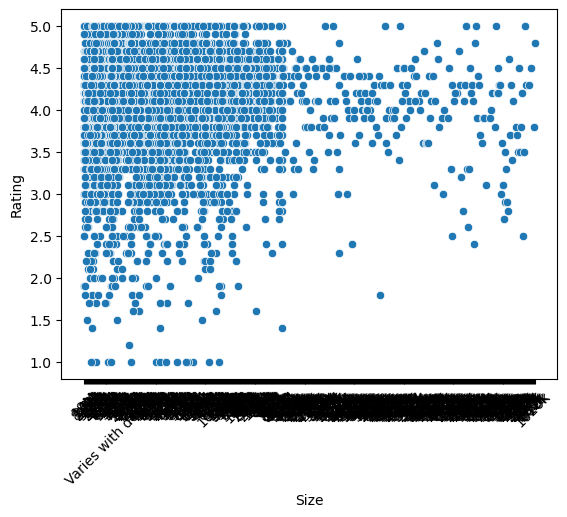

In [34]:
sns.scatterplot(data=gplay,x="Size",y="Rating")
plt.xticks(rotation=45)
plt.show()

>**Inference**: As the size of app increases the number of ratings decreases and minimum rating value increases

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [59]:
gplay.Price=gplay.Price.str.replace("$","")
gplay.Price=gplay.Price.astype(float)

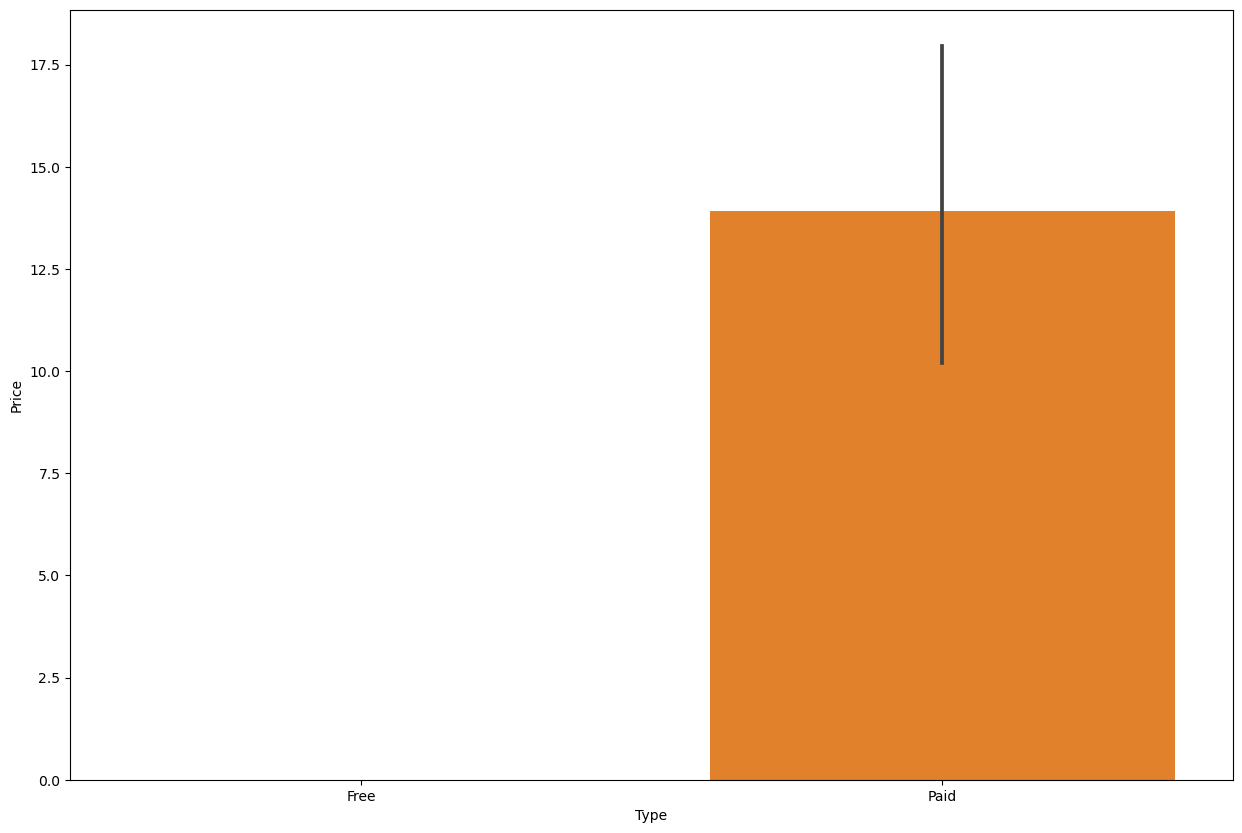

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(data=gplay,x="Type",y="Price")
plt.show()

In [73]:
gplay[gplay["Type"]=="Paid"].Price.describe()

count    800.000000
mean      13.920838
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

`Free` type of apps are more common than `Paid`.<br>
`Paid` types of apps has outliers but maximum of these apps are of <$5.

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [ ]:
gplay.Installs=gplay.Installs.str.replace(",","").str.replace("+","").astype(int)

In [108]:
gplay_new=pd.DataFrame(gplay.groupby("App")["Installs"].sum())
gplay_new=gplay_new.sort_values(by="Installs",ascending=False)
gplay_new

,Installs
App,
Subway Surfers,6000000000
Google News,4000000000
Hangouts,4000000000
Google Drive,4000000000
Google Photos,4000000000
...,...
Ak Parti Yardım Toplama,0
Sweden Newspapers,0
Pekalongan CJ,0


In [114]:
print("The top 10 apps by Installs are mentioned below:"),gplay_new[:10]

The top 10 apps by Installs are mentioned below:


(None,
                                 Installs
 App                                     
 Subway Surfers                6000000000
 Google News                   4000000000
 Hangouts                      4000000000
 Google Drive                  4000000000
 Google Photos                 4000000000
 Instagram                     4000000000
 Candy Crush Saga              3500000000
 Maps - Navigate & Explore     3000000000
 Google Chrome: Fast & Secure  3000000000
 WhatsApp Messenger            3000000000)

### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

The Features that i will use for the analysis are `Category` and `Installs`.

In [118]:
gplay_new2=pd.DataFrame(gplay.groupby("Category")["Installs"].sum())
gplay_new2=gplay_new2.sort_values(by="Installs",ascending=False)
gplay_new2

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


In [131]:
print("The most popular app categories are"),gplay_new2.index[:5]

The most popular app categories are


(None,
 Index(['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL', 'TOOLS'], dtype='object', name='Category'))

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [133]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


To identify the most successful app developers on the Google Play Store, the following features could be analyzed:

1. Ratings: High ratings suggest that users are satisfied with the app, and it is more likely to be downloaded.

2. Installs: A high number of installs indicate that an app is popular and successful.

3. Reviews: User reviews can provide valuable insights into user satisfaction and provide feedback for future improvements.

4. Category: Certain categories such as games, social media, and productivity have higher user demand and revenue potential.

5. Price: The price of an app can impact its popularity and revenue.

To present these findings, the following data visualizations could be used:

1. Scatterplot Matrix: A scatterplot matrix can show the relationship between different features, such as ratings, number of installs, and price.

2. Bar Chart: A bar chart can show the number of installs and ratings for different apps and developers.

3. Heatmap: A heatmap can show the correlation between different features and highlight which features are most strongly related to success.

4. Bubble Chart: A bubble chart can show the relationship between price, number of installs, and ratings for different apps.

5. Word Cloud: A word cloud can be used to visualize the most common words used in user reviews, providing insights into user satisfaction.

By analyzing these features and using appropriate data visualizations, the mobile app development company can identify the most successful app developers on the Google Play Store and use this information to make informed decisions about future partnerships and investments.

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Play Store, the following features could be analyzed:

1. Installs: The number of app downloads over a certain period can help identify trends in user behavior.

2. Ratings: The user ratings of existing apps in the same category can provide insight into user preferences and expectations.

3. Category: Certain app categories may have higher demand at certain times of the day or week.

4. User Demographics: Understanding the demographics of the target audience can help identify when they are most likely to be active on the app store.

To present these findings, the following data visualizations could be used:

1. Bar Chart: A bar chart can be used to show the number of app downloads over a certain period and identify trends in user behavior.

2. Heatmap: A heatmap can be used to visualize user activity during different times of the day or week.

3. Radar Chart: A radar chart can be used to compare user ratings of existing apps in the same category and identify trends in user preferences.

4. Pie Chart: A pie chart can be used to visualize user demographics and identify when the target audience is most active on the app store.

By analyzing these features and using appropriate data visualizations, the marketing research firm can identify the best time to launch a new app on the Google Play Store and use this information to maximize the chances of success for their clients.